In [262]:
rm(list = ls())


# Question 1

## Import libraries

In [263]:
install.packages("psych")
library(psych)
install.packages("ggcorrplot")
library(ggplot2)
library(ggcorrplot)
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")
library(coefplot)
library(dplyr)



## Load and view the dataset

In [1]:
Auto <- read.csv("Auto.csv",header=T,na.string="?")
attach(Auto)
head(Auto)



Warning message in file(file, "rt"):
"cannot open file 'cereal.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


## Explore dataset structure

In [6]:
dim(Auto) # 397*9
names(Auto) # 8 varables
describe(Auto)
str(Auto) 

# length(unique(X)) to check the level of each feature
print("_______________________________________________________")
cat("mpg: ", length(unique(Auto$mpg)),"\n")
cat("cylinders: ", length(unique(Auto$cylinders)),"\n")
cat("displacement: ", length(unique(Auto$displacement)),"\n")
cat("horsepower: ", length(unique(Auto$horsepower)),"\n")
cat("weight: ", length(unique(Auto$weight)))
cat("acceleration: ", length(unique(Auto$acceleration)),"\n")
cat("year: ", length(unique(Auto$year)),"\n")
cat("origin: ", length(unique(Auto$origin)),"\n")
cat("name: ", length(unique(Auto$name)),"\n")

[1] 397   9

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
mpg,1,397,23.515869,7.8258039,23.0,23.064890,8.89560,9,46.6,37.6,0.45256487,-0.5383528,0.3927658
cylinders,2,397,5.458438,1.7015770,4.0,5.338558,0.00000,3,8.0,5.0,0.51887425,-1.3865752,0.0853997
displacement,3,397,193.532746,104.3795833,146.0,182.920063,83.02560,68,455.0,387.0,0.71087813,-0.7703360,5.2386611
horsepower,4,392,104.469388,38.4911599,93.5,99.818471,28.91070,46,230.0,184.0,1.07901906,0.6541069,1.9440972
weight,5,397,2970.261965,847.9041195,2800.0,2909.247649,942.93360,1613,5140.0,3527.0,0.52698320,-0.8069030,42.5550879
acceleration,6,397,15.555668,2.7499953,15.5,15.496552,2.52042,8,24.8,16.8,0.27869902,0.4076265,0.1380183
year,7,397,75.994962,3.6900049,76.0,75.990596,4.44780,70,82.0,12.0,0.01300922,-1.1883950,0.1851960
origin,8,397,1.574307,0.8025495,1.0,1.470219,0.00000,1,3.0,2.0,0.91297154,-0.8404597,0.0402788
name*,9,397,148.926952,89.2924330,150.0,148.746082,118.60800,1,304.0,303.0,0.01789530,-1.2461765,4.4814587


'data.frame':	397 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...
[1] "_______________________________________________________"
mpg:  129 
cylinders:  5 
displacement:  82 
horsepower:  94 
weight:  350acceleration:  95 
year:  13 
origin:  3 
name:  304 


- the dataset is composed of 397 observations and 9 variables with "mpg" being the response variable, and the rest of the 8 being our features for predicting "mpg"

- by using the str(), we can observe the datatype of each variable:
    - mpg: numerical continuous variable
    - cylinders: categorical variable with 5 classes (3,4,5,6,7,8)
    - displacement: numerical continuous variable
    - horsepower: continuous variable with only integers
    - weight: numerical variable with only integers
    - acceleration: numerical continuous variable
    - year: numerical variable with only integers
    - origin: categorical variable with 3 classes {1: American, 2:European, 3: Japanese}
    - name: character type with 304 levels - can be mapped to numerical value 

## Check for missing values
- exploring existing missing values and check which features are missing values

#### Find the missing values and their features 

In [7]:
sum(is.na(Auto)) #5 missing values
colSums(is.na(Auto)) #horsepower has 5 missing values


[1] 5

mpg    cylinders displacement   horsepower       weight acceleration 
           0            0            0            5            0            0 
        year       origin         name 
           0            0            0

- 5 missing value from "horsepower"
- ~1.26% missing data

#### Look at the missing data
- taking a look at the missing data to see if there are any underlying cause as to why these information are missing, and see if any of these observations are unique

In [8]:
missing_data = Auto[!complete.cases(Auto),]#extract missing data, two parts by [rows,cols], rows: not compelte cases in Auto
missing_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
33,25.0,4,98,NA,2046,19.0,71,1,ford pinto
127,21.0,6,200,NA,2875,17.0,74,1,ford maverick
331,40.9,4,85,NA,1835,17.3,80,2,renault lecar deluxe
337,23.6,4,140,NA,2905,14.3,80,1,ford mustang cobra
355,34.5,4,100,NA,2320,15.8,81,2,renault 18i


- by looking at thesse 5 observations we see that:
    - mpg: 3 data points are within 3 standard deviation (std) away of the mean, and the other two are higher than 3rd quantile
    - cylinders: all data points are within 3 std away of the mean
    - weight: 3 data points are within 3 std away of the mean, and two are below the 1st quantile
    - acceleration: all datapoints are within 3 std away of the mean
    - year: 2 datapoints are within 3 std of the mean, 3 are above the 3rd quantile
    - origin: categorical values 
    - name: not able to compare since the features is a character type and has 304 levels
- In conclusion, except for some feature values of certain observations that fall outside of 3 std away from the mean, the rest of feature values are either close or equal to mean or median, or fall within 3 std away of the mean. From this, I have decided to impute the 5 missing values of "horsepower" using mean. Alternatively we could choose to remove it, since the missing value is composed only ~1.26% of the entire dataset

#### Impute the data using mean
- imputed datasete --> Auto_impute

In [9]:
Auto_impute <- Auto

In [10]:

for (i in which(sapply(Auto_impute, is.numeric))) {
  Auto_impute[is.na(Auto_impute[,i]),i] <- mean(Auto_impute[,i],na.rm=TRUE)
}



In [11]:
# checking any missing data left
sum(is.na(Auto_impute)) 
colSums(is.na(Auto_impute)) 


[1] 0

mpg    cylinders displacement   horsepower       weight acceleration 
           0            0            0            0            0            0 
        year       origin         name 
           0            0            0

In [264]:
attach(Auto_impute)

## Checking for outliers
- to check for outliers, we will be plotting boxplots for each feature. We will also use it to find the location of the outliers and further examine if they should be removed from the dataset.

#### Plotting boxplots for numerical values

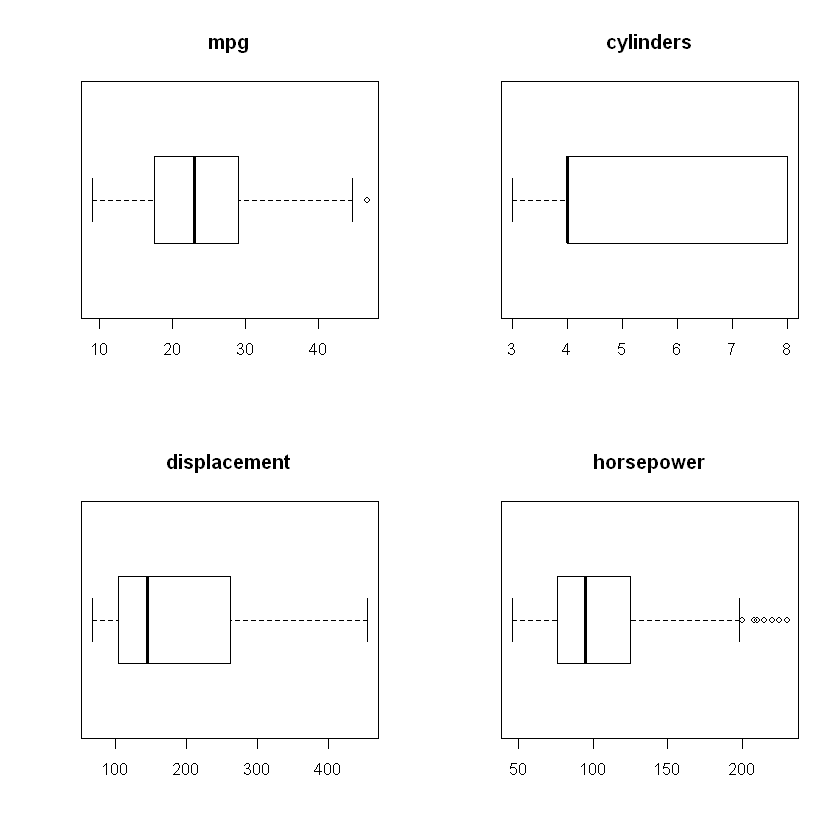

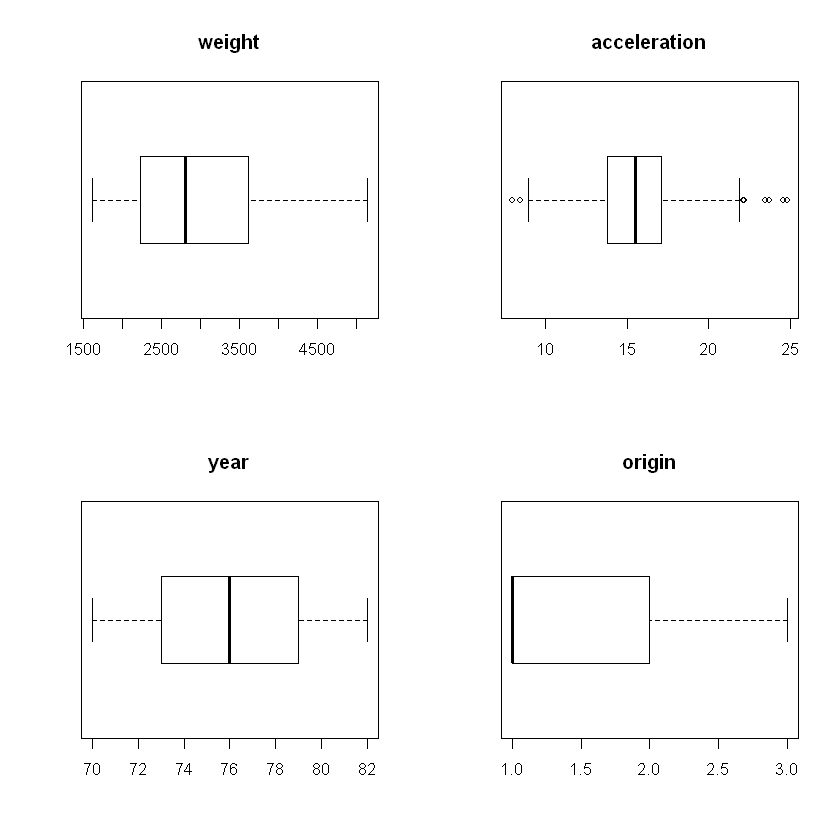

In [13]:
par(mfrow = c(2,2))

for (i in 1:8) {
  boxplot(Auto_impute[i], horizontal = TRUE, main=(names(Auto_impute))[i])
}



- to check for potential outliers within the dataset, the boxplot for each variable (including the response variable) is plotted except for "name" variable. We can see that there are some outliers in: "mpg",","horsepower" and "acceleration" feature space from what we can visibly observe from the boxplots above.
- note that the loop interates only from 1 to 8, because I excluded the "name" variable


#### Find the locations of these obsevations

In [14]:

for (i in 1:8) {  
  outlier = boxplot(Auto_impute[i],plot=FALSE)$out
#   row = Auto_impute[which(Auto_impute[,i] %in% outlier)]
#   print(row)  
  cat(names(Auto_impute)[i], ": ", outlier, '\n\n')  
  row = Auto_impute[which(Auto_impute[,i] %in% outlier),]
  print(row)  
  print('__________________________________________________________________________________________________')  
  cat('\n\n\n')  
}



mpg :  46.6 

     mpg cylinders displacement horsepower weight acceleration year origin
323 46.6         4           86         65   2110         17.9   80      3
         name
323 mazda glc
[1] "__________________________________________________________________________________________________"



cylinders :   

[1] mpg          cylinders    displacement horsepower   weight      
[6] acceleration year         origin       name        
<0 rows> (or 0-length row.names)
[1] "__________________________________________________________________________________________________"



displacement :   

[1] mpg          cylinders    displacement horsepower   weight      
[6] acceleration year         origin       name        
<0 rows> (or 0-length row.names)
[1] "__________________________________________________________________________________________________"



horsepower :  220 215 225 225 215 200 210 208 215 225 230 

    mpg cylinders displacement horsepower weight acceleration year origin

In [15]:
mpg_out <- c(323)
horsepower_out <- c(7, 8, 9, 14, 26, 27, 28, 68, 95, 96, 117 )
acceleration_out <- c(8, 10, 12, 60, 196, 197, 300, 301, 327, 394)


#### Outlier in mpg

In [16]:
Auto_impute[mpg_out,]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
323,46.6,4,86,65,2110,17.9,80,3,mazda glc


- we will not be removing this observation, since the outlier occurs in the response variable, but it will be very useful to see that why this mpg value is an outlier when none of its features are outliers
- by looking at the features of this observation we see that:
    - cylinders = median
    - displacement: above 1st quantile
    - horsepower: above 1st quantile
    - weight: above 1st quantile
    - acceleration: below 3rd quantile
    - year: below 3rd quantile
    - origin: 3
- This is an interesting observation, the 5 features of this observation fall outside the first and second quantile. Except for cylinders which is equal to the mean, and origin which we do not know the distribution of currently, and name which has 304 levels.
- note that this observation is not picked up by other features' boxplot

#### Outliers in horsepower

In [17]:
Auto_impute[horsepower_out,]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina
14,14,8,455,225,3086,10.0,70,1,buick estate wagon (sw)
26,10,8,360,215,4615,14.0,70,1,ford f250
27,10,8,307,200,4376,15.0,70,1,chevy c20
28,11,8,318,210,4382,13.5,70,1,dodge d200
68,11,8,429,208,4633,11.0,72,1,mercury marquis
95,13,8,440,215,4735,11.0,73,1,chrysler new yorker brougham
96,12,8,455,225,4951,11.0,73,1,buick electra 225 custom


- by observing the horsepower outliers we can see that:
    - all observations have 8 cylinders, by doing some research, engines with more cylinders produce more power
    - the displacement of these vehicles are relatively high, all of them above above 3rd quantile, by doing some research, it is normal that  larger displacement contribute to larger horsepower
    - weights for these observations are also above 3rd quantile, by doing some research these variables should not be correlated
- we can also see that the response variable "mpg" for these observations tend to be lower, ranging from 10-16 with all of these datapoints falling above the 1st quantile
- from these datapoints, we can make a very "pre-determined" deduction that a combination of more cylinders, larger displacement,higher horsepower and weight can yield a significantly lower "mpg"
- this deduction can provide important information to the dataset as a whole, therefore they will not be removed from the dataset.

#### Outliers in acceleration 

In [18]:
Auto_impute[acceleration_out,]


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
8,14.0,8,440,215,4312,8.5,70,1,plymouth fury iii
10,15.0,8,390,190,3850,8.5,70,1,amc ambassador dpl
12,14.0,8,340,160,3609,8.0,70,1,plymouth 'cuda 340
60,23.0,4,97,54,2254,23.5,72,2,volkswagen type 3
196,29.0,4,85,52,2035,22.2,76,1,chevrolet chevette
197,24.5,4,98,60,2164,22.1,76,1,chevrolet woody
300,27.2,4,141,71,3190,24.8,79,2,peugeot 504
301,23.9,8,260,90,3420,22.2,79,1,oldsmobile cutlass salon brougham
327,43.4,4,90,48,2335,23.7,80,2,vw dasher (diesel)
394,44.0,4,97,52,2130,24.6,82,2,vw pickup


- by observing the horsepower outliers we can see that there are two groups of outliers --> observations that fall above the 1st quantile and below the 3rd quantile:
    - observations above 1st quantile:
        - all 8 cylinders, extremely high displacment, horsepower and weight 
        - low mpg 
        - this category agreed with the deduction we made earlier that a combination of ( 8 cylinders, high displacement, horsepower and weight) can lead to low mpg. We can ask ourselves that maybe a low accleration will further contribute to this phenomenom.
        - By taking a lookg back at the datapoints where horsepower are outliers, we can see that these datapoints also have relatively low (some below mean, some above 1st quantile).
        - we can conclude that a combination of more cylinders, larger displacement, higher horsepower, and larger weight, smaller acceleration contribute to a lower mpg value
    - Observations below 3rd quantile:
        - most of datapoints have 4 cylinders except for 1
        - most of them have low displacement except for 1 that is in 3rd quantile
        - most of them have low horsepower except for one that is close to the mean
        - weights are relatively lower, two are above the mean
        - all mpg values are above the mean, some are in third quantile, two of them are extremely high
        - we also see that the two datapoints with extremely high mpg values are produced after the 80s
        
- overall, these datapoints further substantiated our deduction earlier. However we will be removing observation 301, since this observation yielded a low mpg value while having a large number of cylinders, high displacement, average horsepower, larger weight and high acceleration. This combination is unlike what we have observed before, we can conclude that leaving this datapoint will not contribute to our model. 
      

#### removing outliers

In [19]:
Auto_impute <- Auto_impute %>% slice(-c(301))


In [20]:
dim(Auto_impute)

[1] 396   9

## Distribution of features



#### Plotting Histogram

- to view the distribution of each feature, we will plot the histogram for each numerical features, since we arleady know that name has 304 unique values and is a character type, we will not be plotting a histogram for name. 

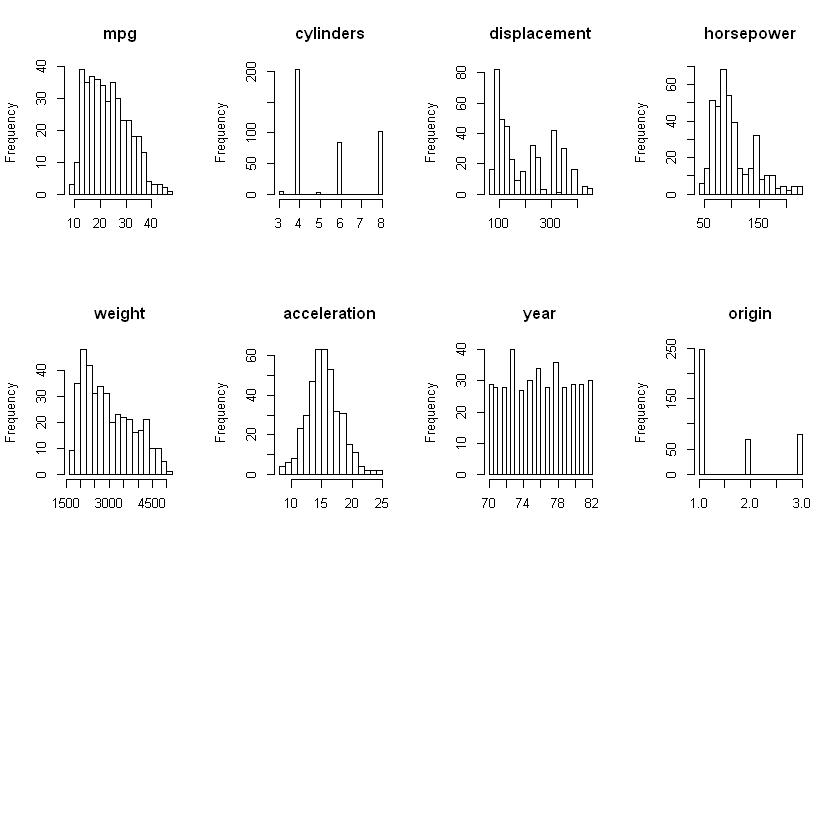

In [21]:

par(mfrow = c(3,4))
for (i in 1:8) {
  hist(as.numeric(Auto_impute[,i]),breaks = 20,main=names(Auto_impute)[i],xlab=NULL)
}



- From the histograms above we can see that the distribution of each feature:
    - mpg: slightly right skewed, most vehicles are within ~10-25 range
    - cylinders: most cars have 4, 6, and 8 cylinders with 4 having the highest frequency, a few observation have 3 or 5 cylinders, and none has 7. By doing some research, I found that most cars will have even number of cylinders because in order to ensure that the engine is balanced for vibration. Having even number of cylinders will make sure that the sample number of pistons are moving in the opposite direction.
    - displacement: right skewed
    - horsepower: slightly right skewed
    - weight: right skewed
    - acceleration: close to a normal distribution
    - year: almost uniformly distributed
    - origin: a large number of observations are American

## Relationship between features

#### Plotting the pairwise plots to explore the relationship between each pair of features

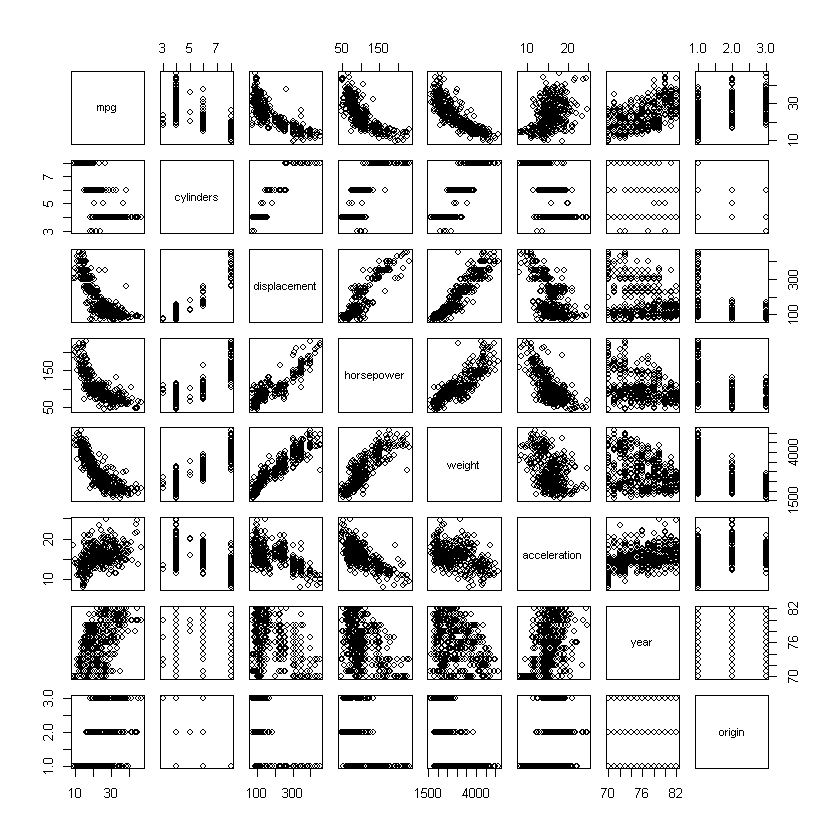

In [67]:
pairs(Auto_impute[1:8])

- By looking at the pair-wise plots above we extract some information:
    - mpg: 
        - mpg-cylinders: vehicles with more cylinders have lower mpg value --> inversely related
        - mpg-displacement: the plot looks like a negative exponential graph, we can take the log of both values
        - mpg-horsepower: the plot looks like a negative exponential graph, we can take the log of both values
        - mpg-weight: the plot looks like a negative exponential graph, we can take the log of both values
        - mpg-acceleration: the plot shows a slightly positive linear relationship, although the correlation looks small
        - mpg-year: the plot shows that newer car tend to have higher mpg --> positive relationship
        - mpg-origin: the plot shows that Japanese and European cars tend to have a slight higher mpg than American cars, although the range of these three groups are relatively large
    - cylinders:
        - cylinders-displacement: postive  relationship, more cylinders corresponds to higher displacement 
        - cylinders-horsepower: postive  relationship, more cylinders corresponds to higher horsepower 
        - cylinders-weight: postive  relationship, more cylinders corresponds to higher weight 
        - cylinders-acceleration: slight negative relationship, cars with lower number of cylinders tend to have higher acceleration, although the points are range of acceleration values in each category are wide.
        - cylinders-year: no visible correlation
        - cylinders-origin: American cars tend to have either 4,6,8 cylinders, European cars have 4,5,6, and Japanese cars have 3,4,6, no obvious correlation can be observed 
    - displacement
        - displacement-horsepower: postive linear relationship, higher displacement corresponds to higher horsepower
        - displacement-weight: postive linear relationship, higher displacement corresponds to larger weight
        - displacement-acceleration: negative linear relationship, higher displacement corresponds to lower acceleration
        - displacement-year: no obvious visible relationship
        - displacement-origin: no obvious visible relationship, however, you can see that American cars has a wide range of displacement
    - horsepower
        - horsepower-weight: postive linear relationship, higher horspower corresponds to larger weight
        - horsepower-acceleration: negative linear relationship, higher horspower corresponds to higher acceleration
        - horsepower-year: no obvious visible relationship
        - horsepower-origin: no obvious visible relationship, however, you can see that American cars has a wide range of horsepower
    - weight:
        - weight-acceleration: slight negative relationship, although the correlation seems to be small 
        - weight-year: no obvious visible relationship
        - weight-origin: American cars have wider range of weight, followed by European then Japanese
    - acceleration:
        - acceleration-year: no obvious visible relationship
        - acceleration-origin: American cars on average tend to have lower acceleration, followed by Japanese then European
    - year:
        - year-origin: no obvious visible relationship

#### variable transformation
- by looking at the histogram, and the pair-wise plots we are can see that transformation will make the data behave like Guassian distribution. As shown in histogram, that mpg, displacement, horsepower, and weight are skewed, we will proceed to transform these features. 

In [53]:
log_mpg = log(mpg+1)
frth_displacement = (displacement)^(1/4)
log_horsepower = log(horsepower+1)
log_weight = log(weight+1)



- as shown in the histograms before that mpg, displacement, horsepower and displacement are all right skewed, we can perform log transformation, specifically log(feature+C), with C being a constant in order to nullify the existing 0 values within thesse features

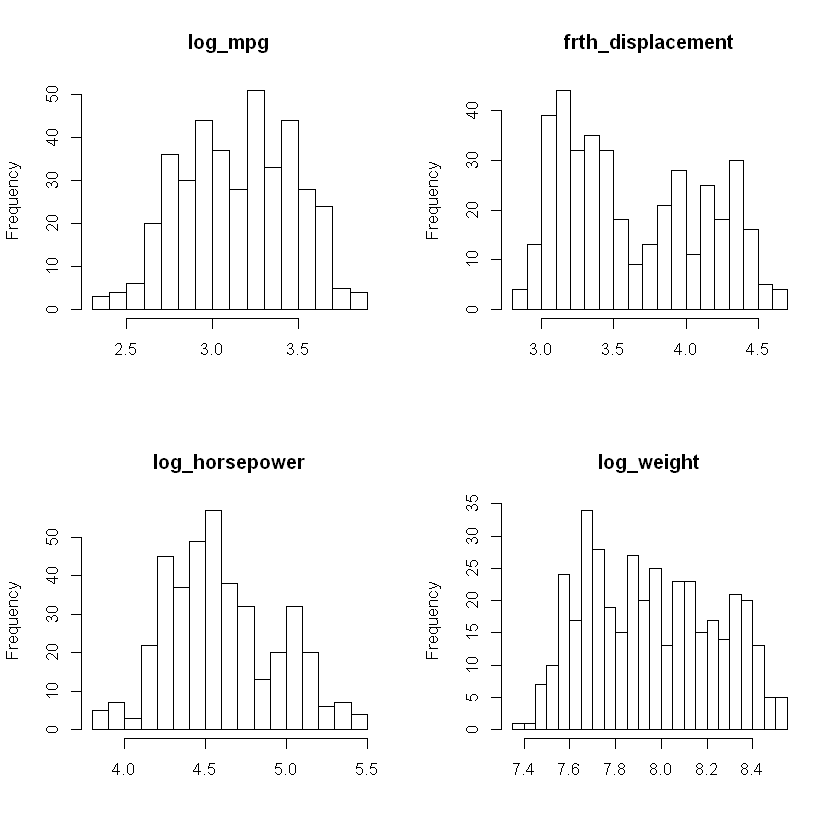

In [54]:

par(mfrow = c(2,2))
hist(log_mpg,breaks=20,main="log_mpg",xlab=NULL)
hist(frth_displacement,breaks=20,main="frth_displacement",xlab=NULL)
hist(log_horsepower,breaks=20,main="log_horsepower",xlab=NULL)
hist(log_weight,breaks=20,main="log_weight",xlab=NULL)



- Here we showed the histograms for the transformed value, we can see that the distributions behave more like a Guassian distribution, we some features still be slightly skewed (weight), however the skewness has significantly improved
- Note that for horsepower is transformed using (feature+C) to the fourth power. I have previously tried with log transformation however, the result came out still being slightly skewed. Therefore 1/4 has shown to provide the best outcome. Although we can kind of see a bimodal distribution in this feature. 

#### Replacing the original features 
- mpg, displacement, horsepower and weight are replaced with the transformed variables. We will call this new dataset "Auto_transformed"
- Note that we should cbind() to put all the wanted columns together, this function automatically maps the object type data to a numerical (integer) value. Therefore, name is now converted to numerical values

In [94]:
Auto_transformed = as.data.frame(cbind(log_mpg,cylinders,frth_displacement,log_horsepower,log_weight,acceleration,year,origin,name))

In [265]:
attach(Auto_transformed)

In [85]:
head(Auto_transformed)
names(Auto_transformed)

log_mpg,cylinders,frth_displacement,log_horsepower,log_weight,acceleration,year,origin,name
2.944439,8,4.185859,4.875197,8.161946,12.0,70,1,49
2.772589,8,4.325308,5.111988,8.214465,11.5,70,1,36
2.944439,8,4.222861,5.017280,8.142354,11.0,70,1,231
2.833213,8,4.175595,5.017280,8.141481,12.0,70,1,14
2.890372,8,4.168710,4.948760,8.146130,10.5,70,1,161
2.772589,8,4.551078,5.293305,8.376090,10.0,70,1,141


[1] "log_mpg"           "cylinders"         "frth_displacement"
[4] "log_horsepower"    "log_weight"        "acceleration"     
[7] "year"              "origin"            "name"

#### Pair-wise plot with transformed variables

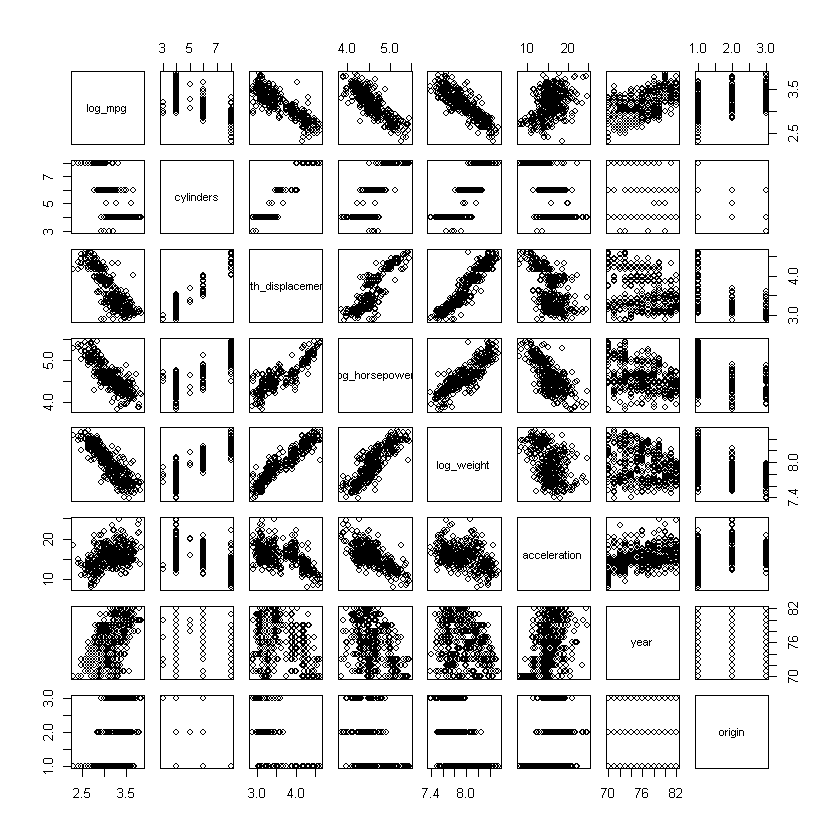

In [86]:
pairs(Auto_transformed[1:8])

- By looking at the pair-wise plots above, we see that the relationship between mpg and displacement, horsepower and weight exhibited a negative exponential graph. After the transformation, we can see that these graphs are now have negative linear relationship.

#### Correlation between features
- By obtaining the correlation between each two features we can numerically determine how related each two features are 

In [87]:
cor(Auto_transformed)


,log_mpg,cylinders,frth_displacement,log_horsepower,log_weight,acceleration,year,origin,name
log_mpg,1.0000000,-0.8249950,-0.8618974,-0.8420055,-0.8740676,0.4463587,0.57829584,0.5596968,0.26872265
cylinders,-0.8249950,1.0000000,0.9495620,0.8386949,0.8834335,-0.5040606,-0.34671722,-0.5649716,-0.28034613
frth_displacement,-0.8618974,0.9495620,1.0000000,0.8728258,0.9404821,-0.5103226,-0.34201283,-0.6556596,-0.31619730
log_horsepower,-0.8420055,0.8386949,0.8728258,1.0000000,0.8672998,-0.6950937,-0.39338015,-0.4818866,-0.26681533
log_weight,-0.8740676,0.8834335,0.9404821,0.8672998,1.0000000,-0.4045702,-0.28587343,-0.6049105,-0.27455240
acceleration,0.4463587,-0.5040606,-0.5103226,-0.6950937,-0.4045702,1.0000000,0.28290089,0.2100836,0.13647687
year,0.5782958,-0.3467172,-0.3420128,-0.3933802,-0.2858734,0.2829009,1.00000000,0.1843141,0.08185952
origin,0.5596968,-0.5649716,-0.6556596,-0.4818866,-0.6049105,0.2100836,0.18431408,1.0000000,0.35854033
name,0.2687226,-0.2803461,-0.3161973,-0.2668153,-0.2745524,0.1364769,0.08185952,0.3585403,1.00000000


#### Plotting the correlation chart

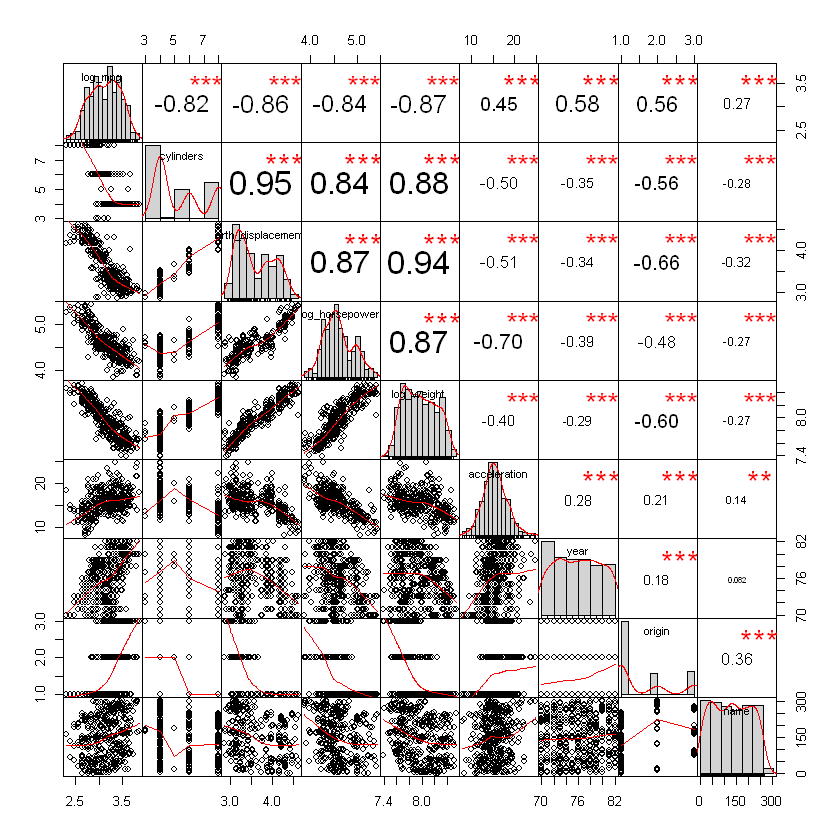

In [88]:
chart.Correlation(Auto_transformed, histogram=TRUE, pch=19)

- cylinders are highly positively correlated with frth_displacement,log_horsepower, and log weight area highly correlated 
- frth_displacement are highly positively correlated with log_horsepower and log_weight
- mpg are highly negatively correlated with cylinders, frth_displacement, log_horsepower and log_weight
_____________________
- the above three abservations tells us that cylinders, frth_displacement, log_horsepower and log weight are good predictors for predicting log_mpg, however these features are so correlated that we might not need all of them to accurately predict mpg

#### Heatmap to further visualize the correlation between features

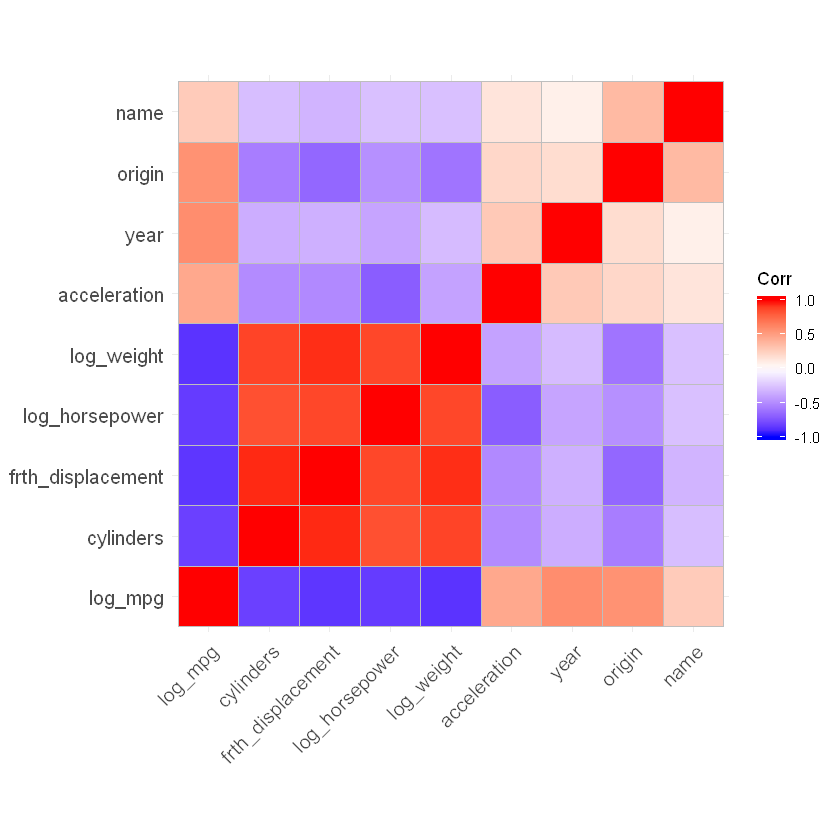

In [96]:
 ggcorrplot(cor(Auto_transformed))

# Question 2: Multiple Regression using LM()

### First include all variables in the model

In [97]:
lm1 <- lm(formula = log_mpg~(cylinders+frth_displacement+log_horsepower+log_weight+acceleration+year+origin+name),data= Auto_transformed)

In [98]:
summary(lm1)


Call:
lm(formula = log_mpg ~ (cylinders + frth_displacement + log_horsepower + 
    log_weight + acceleration + year + origin + name), data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38269 -0.06268 -0.00101  0.05927  0.36590 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.994e+00  3.681e-01  18.999  < 2e-16 ***
cylinders         -1.311e-02  1.069e-02  -1.226 0.220829    
frth_displacement  1.923e-02  5.717e-02   0.336 0.736778    
log_horsepower    -1.907e-01  5.219e-02  -3.653 0.000295 ***
log_weight        -6.441e-01  7.412e-02  -8.689  < 2e-16 ***
acceleration      -5.000e-03  3.491e-03  -1.432 0.152936    
year               2.890e-02  1.657e-03  17.437  < 2e-16 ***
origin             2.046e-02  9.831e-03   2.081 0.038068 *  
name               4.860e-05  6.674e-05   0.728 0.466907    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1092 on 388 deg

- the summary(model) provides a detailed report of your model, I am primary focusing the P-value for each feature as this provides us with information regarding the significance of each feature. Adjusted R-squared value gives us information regarding the accuracy (how close the data points are to the fitted line) of our model, and lastly p-value of overall model. Overall a p-value < 0.05 indicates that something is significant, Adjusted R-squared value close to 1 indicates higher accuracy.
____________________________
- we can see that log_weight, log_horsepower, year and origin have p_value < 0.05, we will go ahead and keep these features and eliminate others
- we can see that the adjusted R-squared value os 0.8868
- we can see that the p-value for the entire model is also less than 0.05

### Second model after eliminating some features

In [130]:
lm2 <- lm(formula = log_mpg~(log_horsepower+log_weight+year+origin),data= Auto_transformed)
summary(lm2)


Call:
lm(formula = log_mpg ~ (log_horsepower + log_weight + year + 
    origin), data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36911 -0.06677  0.00042  0.06337  0.36986 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.212672   0.275905  26.142  < 2e-16 ***
log_horsepower -0.146497   0.034529  -4.243 2.76e-05 ***
log_weight     -0.710034   0.043852 -16.192  < 2e-16 ***
year            0.029276   0.001633  17.928  < 2e-16 ***
origin          0.021491   0.008656   2.483   0.0135 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1093 on 392 degrees of freedom
Multiple R-squared:  0.8878,	Adjusted R-squared:  0.8866 
F-statistic: 775.1 on 4 and 392 DF,  p-value: < 2.2e-16


 - from the summary of our updated model we can see that:
    - p-values for some features have decreased (become more important as other features are removed)
    - R-squared value is now 0.8866, only 0.0002 lower than lm1, indicating that the features we eliminated did not contribute greatly to the model
    - p-value for the overall model stayed the same
 - we can also see that origin's p-value although less than 0.05, but significantly higher than other features p-values, we will try to fit the data without origin. 


### Final model before considering potential interactions between features

In [131]:
lm3 <- lm(formula = log_mpg~(log_horsepower+log_weight+year),data= Auto_transformed)
summary(lm3)


Call:
lm(formula = log_mpg ~ (log_horsepower + log_weight + year), 
    data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36378 -0.06622  0.00313  0.06299  0.36031 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.557825   0.239883  31.506  < 2e-16 ***
log_horsepower -0.136378   0.034512  -3.952  9.2e-05 ***
log_weight     -0.756963   0.039828 -19.006  < 2e-16 ***
year            0.029481   0.001642  17.959  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.11 on 393 degrees of freedom
Multiple R-squared:  0.886,	Adjusted R-squared:  0.8851 
F-statistic:  1018 on 3 and 393 DF,  p-value: < 2.2e-16


 - from the summary of our updated model we can see that:
    - p-values log_horsepower increased, although still siginificantly lower than 0.05, and other p-values stayed the same.
    - R-squared value is now 0.8851, only 0.0011 lower than lm2, indicating that the including origin will not improve the performance of the model by a lot.
 - In conclusion, the features: cylinders, frth_displacement, acceleration, name and origin are not significant in predicting mpg

### Including the all interactions of the remaining features

In [150]:
interaction1 <- lm(formula = log_mpg~(log_horsepower*log_weight*year),data= Auto_transformed)
summary(interaction1)



Call:
lm(formula = log_mpg ~ (log_horsepower * log_weight * year), 
    data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.35570 -0.06555  0.00167  0.06403  0.35994 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)
(Intercept)                    28.386122  48.384141   0.587    0.558
log_horsepower                 -1.123059  10.645058  -0.106    0.916
log_weight                     -4.911548   6.075012  -0.808    0.419
year                           -0.255362   0.646332  -0.395    0.693
log_horsepower:log_weight       0.457158   1.324659   0.345    0.730
log_horsepower:year             0.015048   0.142499   0.106    0.916
log_weight:year                 0.056237   0.081190   0.693    0.489
log_horsepower:log_weight:year -0.006324   0.017746  -0.356    0.722

Residual standard error: 0.1079 on 389 degrees of freedom
Multiple R-squared:  0.8915,	Adjusted R-squared:  0.8896 
F-statistic: 456.8 on 7 and 389 DF,  p-value:

- from this model we can see that although the adjusted R-squared value is pretty high - 0.8869. However the p-value for each feature and intersection all features have become significantly larger than 0.05 making all variables insignificant 

- we can conclude that including all interaction between variable might reduce the performance of the model

### Model interaction between features individually

- we will try model with all possible combination of interactions between three feaures and model these interaction individually.
- we will be looking at the adjusted r-squared value only, by doing that we can see the model performance if we only have one combination of interaction as predictor. This can help us to see that if a particular interaction can contribute to the overall model
- we will not be looking at the p-value for the interaction since, we only have one predictor

In [152]:
interaction2 <- lm(formula = log_mpg~(log_horsepower:log_weight:year),data= Auto_transformed)
summary(interaction2)



Call:
lm(formula = log_mpg ~ (log_horsepower:log_weight:year), data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57673 -0.19576 -0.01664  0.18069  0.63823 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     5.355e+00  1.264e-01   42.36   <2e-16 ***
log_horsepower:log_weight:year -7.934e-04  4.523e-05  -17.54   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2437 on 395 degrees of freedom
Multiple R-squared:  0.4379,	Adjusted R-squared:  0.4365 
F-statistic: 307.7 on 1 and 395 DF,  p-value: < 2.2e-16


In [151]:
interaction3 <- lm(formula = log_mpg~(log_weight:log_horsepower),data= Auto_transformed)
summary(interaction3)



Call:
lm(formula = log_mpg ~ (log_weight:log_horsepower), data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52962 -0.09313  0.00194  0.09725  0.54029 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                5.836228   0.074007   78.86   <2e-16 ***
log_weight:log_horsepower -0.073296   0.002006  -36.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1553 on 395 degrees of freedom
Multiple R-squared:  0.7716,	Adjusted R-squared:  0.771 
F-statistic:  1334 on 1 and 395 DF,  p-value: < 2.2e-16


In [154]:
interaction4 <- lm(formula = log_mpg~(log_horsepower:year),data= Auto_transformed)
summary(interaction4)



Call:
lm(formula = log_mpg ~ (log_horsepower:year), data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.71843 -0.24424 -0.01208  0.22655  0.73950 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.3922342  0.2071062   26.04   <2e-16 ***
log_horsepower:year -0.0064304  0.0005919  -10.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2852 on 395 degrees of freedom
Multiple R-squared:   0.23,	Adjusted R-squared:  0.2281 
F-statistic:   118 on 1 and 395 DF,  p-value: < 2.2e-16


In [155]:
interaction5 <- lm(formula = log_mpg~(year:log_weight),data= Auto_transformed)
summary(interaction5)



Call:
lm(formula = log_mpg ~ (year:log_weight), data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85159 -0.22967  0.01413  0.24971  0.71934 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.4700979  0.3211208  10.806   <2e-16 ***
year:log_weight -0.0005333  0.0005306  -1.005    0.315    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3246 on 395 degrees of freedom
Multiple R-squared:  0.002551,	Adjusted R-squared:  2.583e-05 
F-statistic:  1.01 on 1 and 395 DF,  p-value: 0.3155


- we  can observation from model interaction2 to interaction 5 and their respective adjuted-Rsquared values:
    - log_horsepower:log_weight:year -  0.4365
    - log_horsepower:log_weight - 0.771
    - log_horsepower:year - 0.2281
    - log_weight:year - 2.583e-05 
    
 - we can conlude that the interaction between log_horsepower and log_weight could be a useful predictor on its own, the interaction between all three features could potentially be useful. The other interactions generated low adjusted R-square value. Therefore, we will not be including this in the final model

#### Combining the final model (lm3) and useful interactions 

In [159]:
lm4 <- lm(formula = log_mpg~(log_horsepower*log_weight+year),data= Auto_transformed)
summary(lm4)


Call:
lm(formula = log_mpg ~ (log_horsepower * log_weight + year), 
    data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36005 -0.06613  0.00349  0.06163  0.36268 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                9.277749   2.196320   4.224 2.98e-05 ***
log_horsepower            -0.517721   0.485284  -1.067 0.286700    
log_weight                -0.972905   0.276985  -3.512 0.000496 ***
year                       0.029674   0.001661  17.870  < 2e-16 ***
log_horsepower:log_weight  0.047373   0.060132   0.788 0.431283    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1101 on 392 degrees of freedom
Multiple R-squared:  0.8862,	Adjusted R-squared:  0.885 
F-statistic: 762.9 on 4 and 392 DF,  p-value: < 2.2e-16


- after including the interaction between log_weight and log_horsepower, along with the three features we kept (log_horsepower, log_weight, year) we can see that:
    - log_horsepower's value has significantly increased making it an insignificant feature
    - Adjusted R-square value did not change a lot 0.0001 less than the model without any interaction, we will go ahead and remove log_horsepower as a predictor

In [164]:
lm5 <- lm(formula = log_mpg~(log_horsepower:log_weight+log_weight+year),data= Auto_transformed)
summary(lm5)
print("____________________summary with model with out interacation_____________________ \n")
summary(lm3)


Call:
lm(formula = log_mpg ~ (log_horsepower:log_weight + log_weight + 
    year), data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36548 -0.06706  0.00360  0.06227  0.35978 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                6.960237   0.323906  21.488  < 2e-16 ***
log_weight                -0.683813   0.057374 -11.919  < 2e-16 ***
year                       0.029451   0.001648  17.874  < 2e-16 ***
log_horsepower:log_weight -0.016616   0.004279  -3.883 0.000121 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1101 on 393 degrees of freedom
Multiple R-squared:  0.8858,	Adjusted R-squared:  0.885 
F-statistic:  1016 on 3 and 393 DF,  p-value: < 2.2e-16


[1] "____________________summary with model with out interacation_____________________ \n"



Call:
lm(formula = log_mpg ~ (log_horsepower + log_weight + year), 
    data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36378 -0.06622  0.00313  0.06299  0.36031 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.557825   0.239883  31.506  < 2e-16 ***
log_horsepower -0.136378   0.034512  -3.952  9.2e-05 ***
log_weight     -0.756963   0.039828 -19.006  < 2e-16 ***
year            0.029481   0.001642  17.959  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.11 on 393 degrees of freedom
Multiple R-squared:  0.886,	Adjusted R-squared:  0.8851 
F-statistic:  1018 on 3 and 393 DF,  p-value: < 2.2e-16


- After removing the log_horsepower variable, we left with a model with "year","log_weight", and "log_weight:log_horsepower" as a predictor (lm5). We will then compare lm5 with our initial model with only "year". "log_weight", and "log_horsepower"  (without interactions) as our predictor, we see that:
    - the two model almost perform the same, with nearly identical Adjuted R-squared value, standard error, F-statistics. The p-values for each model change, all the p-values for both models are less than 0.05, but we can see that the overall p-values for the initial model without any interaction is overall higher. The p-value for log_horspower_log_weight interaction is slightly higher. 
    - Therefore we can conclude that both models behave similarly and are estimated to have simular performance. In this case, I will be choosing lm3, which is the initial model as our final model due to all p-values being slight lower

### Final Model

In [167]:
lm3
summary(lm3)


Call:
lm(formula = log_mpg ~ (log_horsepower + log_weight + year), 
    data = Auto_transformed)

Coefficients:
   (Intercept)  log_horsepower      log_weight            year  
       7.55782        -0.13638        -0.75696         0.02948  



Call:
lm(formula = log_mpg ~ (log_horsepower + log_weight + year), 
    data = Auto_transformed)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36378 -0.06622  0.00313  0.06299  0.36031 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.557825   0.239883  31.506  < 2e-16 ***
log_horsepower -0.136378   0.034512  -3.952  9.2e-05 ***
log_weight     -0.756963   0.039828 -19.006  < 2e-16 ***
year            0.029481   0.001642  17.959  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.11 on 393 degrees of freedom
Multiple R-squared:  0.886,	Adjusted R-squared:  0.8851 
F-statistic:  1018 on 3 and 393 DF,  p-value: < 2.2e-16


## a) and c) 
- First by viewing the distribution of each feature, transformations are performed on "mpg","displacement","horsepower", and "weight." Therefore we are left with models having response variable "log_mpg", and features including "frth_displacement", "log_horsepower","log_weight","cylinders","year","origin", and "name". By first fitting the linear regression with all features, and use the summary() on our model. We can look at the p-value of each feature. A feature with p-value < 0.05 is an indicator that this feature is significant in predicting the response variable. From the first model "lm1" we can see that features with p-values < 0.05 are: log_horsepower, log_weight, origin, and name. However, although p-value of origin is less than 0.05, it is still large relative to the other features. We can determine that "origin" is less significant. We further looked into the interaction between different features as potential beneficial predictor to include in our model. We then performed a simple linear regression with each combination of interaction as the predictor and found out that the model with log_horsepower and log_weight interaction yielded a adjusted R-squared value. The next step was to combine the individual predictors and the useful interaction, which increased the p-value for log_horsepower. We removed log_horespower, and kept log_weight, year and log_horsepower:log_weight interaction as our predictors in the final model. We compared this model with our intiial model that did not include interaction and only the three features. We observed that both models behave similarly, and is expected to perform well. We then chose the original model as our final model.

- In conclusion:
    - significant features: log_horsepower, log_weight, year and origin with the previous three more important than the origin
    - significant interaction: log_horsepower:log_weight
    - final combination that is expected to yield the best result: (log_horsepower , log_weight, year) or (log_weight, year, log_horespower:log_weight)


## b)
- the coefficient of "year" is 0.029481. This suggests a positive relationship between mpg and year. Meaning that evey year on average, mpg is improved by 0.029481. In layman's term that every year, the car's consumption of fuel is lessed due to increased fuel efficiency of ~3%. 

# Question 3

## Import Libraries

In [266]:
install.packages('MASS')
library(MASS)


In [183]:
head(Boston)
dim(Boston) #506 x 14 
sum(is.na(Boston)) #no data missing
names(Boston)
describe(Boston)
str(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  14

[1] 0

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
crim,1,506,3.61352356,8.6015451,0.25651,1.6816300,0.3283218,0.00632,88.9762,88.96988,5.1922223,36.59581589,0.382385321
zn,2,506,11.36363636,23.3224530,0.00000,5.0800493,0.0000000,0.00000,100.0000,100.00000,2.2124881,3.95238731,1.036809500
indus,3,506,11.13677866,6.8603529,9.69000,10.9318719,9.3700320,0.46000,27.7400,27.28000,0.2932747,-1.24019490,0.304979888
chas,4,506,0.06916996,0.2539940,0.00000,0.0000000,0.0000000,0.00000,1.0000,1.00000,3.3857377,9.48197035,0.011291412
nox,5,506,0.55469506,0.1158777,0.53800,0.5450601,0.1297275,0.38500,0.8710,0.48600,0.7249897,-0.08741064,0.005151391
rm,6,506,6.28463439,0.7026171,6.20850,6.2528744,0.5122383,3.56100,8.7800,5.21900,0.4012223,1.84183241,0.031235142
age,7,506,68.57490119,28.1488614,77.50000,71.1960591,28.9848300,2.90000,100.0000,97.10000,-0.5954162,-0.97802966,1.251369525
dis,8,506,3.79504269,2.1057101,3.20745,3.5393786,1.9142590,1.12960,12.1265,10.99690,1.0057898,0.45759158,0.093610233
rad,9,506,9.54940711,8.7072594,5.00000,8.7339901,2.9652000,1.00000,24.0000,23.00000,0.9988651,-0.87892910,0.387084894
tax,10,506,408.23715415,168.5371161,330.00000,400.0443350,108.2298000,187.00000,711.0000,524.00000,0.6659891,-1.15031761,7.492388692


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


## a). Pairwise plots

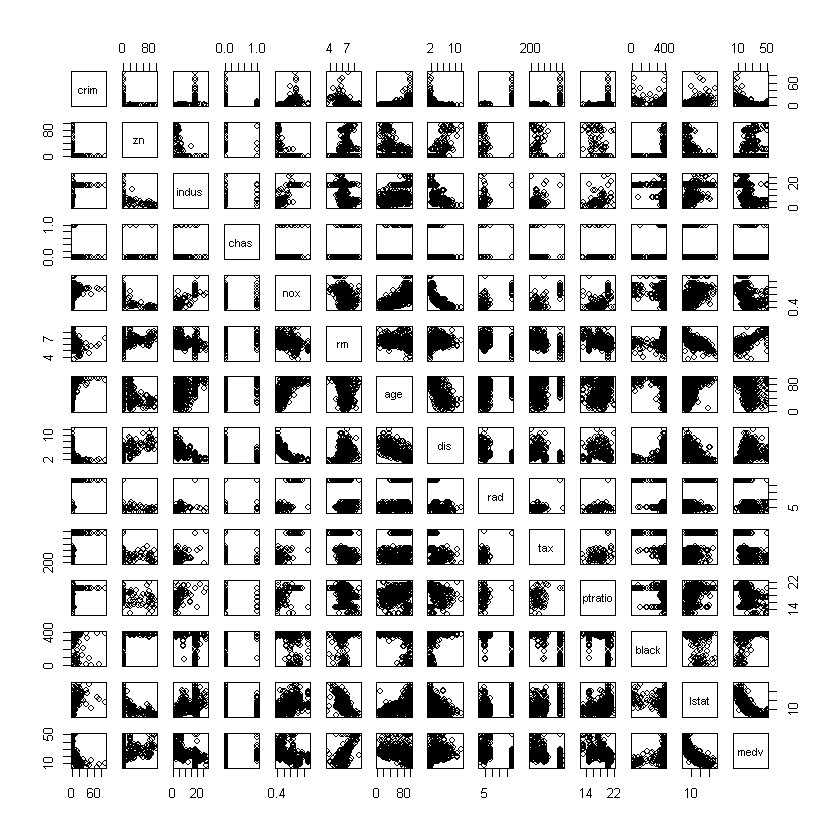

In [184]:
pairs(Boston)

- By looking at the pairplots we can observe that:
    - crim: per capita crime rate seems to have a postive  relatonship with age and nox, and negative  relationship with dis and medx.
    - zn: seems to have negative  relationship withindus, nox  and lstat, and positive  relationship with dis.
    - indus:positive relationship with nox, and negative relationship wihtdis
    - nox: has negative relationship with dis and medv and negative relationship with age and lstat
    - rm: has negative relationship with ptratio and lstat and positive relationship medv
    - age: has negative relationship with dis and black and positive relationship with lstat
    - pratio: has negative relationship with lstat
    - lstat: negative relationship with medv 
    
- note some relationships that are not mentioned because no obvious visble relationship can be observed. 

## b) Per capita crime rate vs. other features

- first I viewed the distribution of per capita crime rate, which is seen to be extremely right skewed.

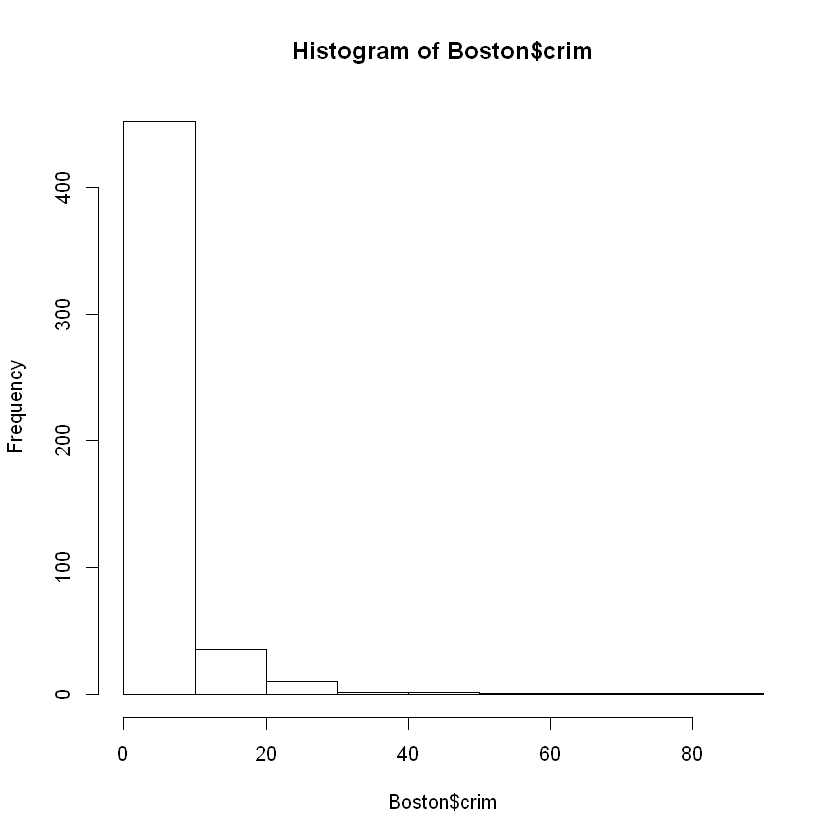

In [232]:
hist(Boston$crim)

- Transform "crim" to force it to behave more like Gaussian Distribution

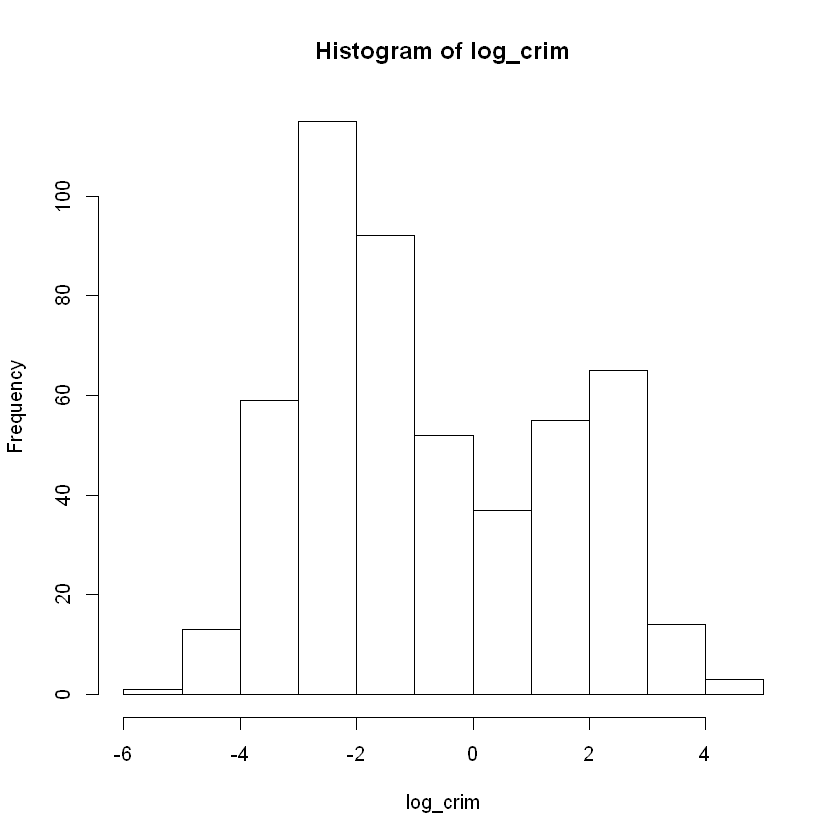

In [226]:
log_crim = log(Boston$crim)
hist(log_crim)

- make new dataframe replacing crim with log_crim

In [227]:
Boston_new = cbind(log_crim,Boston[2:14])


In [228]:
head(Boston_new,1)

log_crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
-5.064036,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24


- plot pairwise plot with crim and other features

In [234]:
cor(Boston_new)

,log_crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
log_crim,1.00000000,-0.51709145,0.73082136,0.028496480,0.78861573,-0.30694282,0.65828357,-0.68190317,0.853406927,0.82823360,0.3895537,-0.47875518,0.6266150,-0.4543020
zn,-0.51709145,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.73082136,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,0.02849648,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.78861573,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.30694282,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.65828357,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.68190317,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.85340693,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.82823360,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


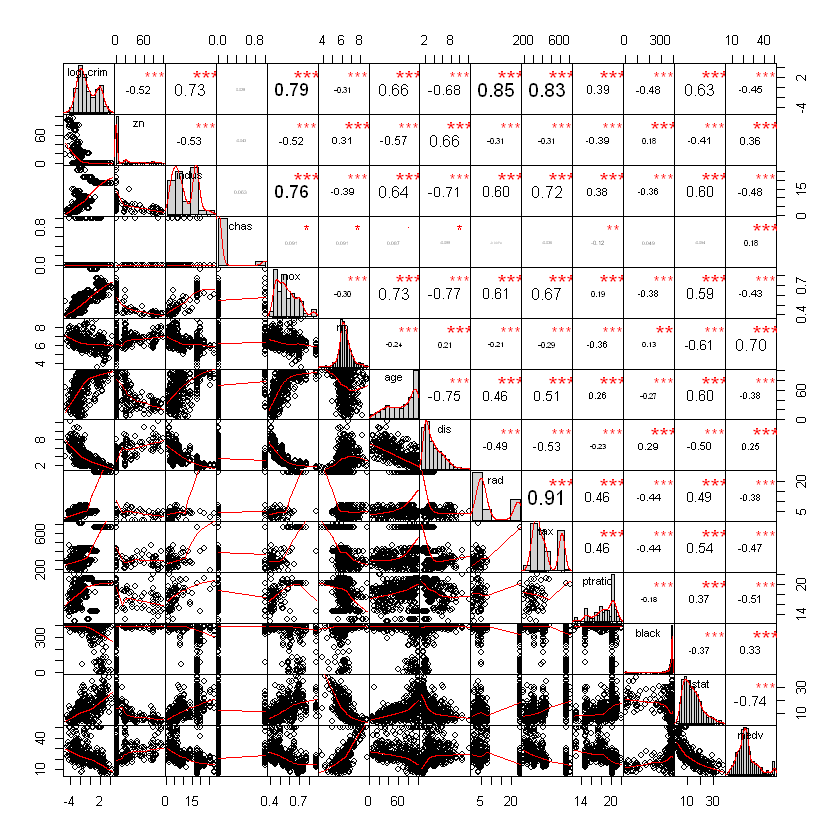

In [235]:
chart.Correlation(Boston_new, histogram=TRUE, pch=19)

- by looking at correlation and the pairwise plot and the correlation values, we can see that:
    - rad (index of accesibility to radial highway): 0.85, highly positively associated with "crim"
    - tax (dull-value property-tax rate per $10,000): 0.83, highly positively associated with "crim"
    - nox (nitric oxide concentration): 0.79, highly positively associated with "crim"
    - indus (proportion of non-retail business acres per town): 0.74, highly positively associated with "crim"
- In conclusion

## C) suburbs with particularly high crime rates, tax rates and  Pupil-teacher ratios

In order to find suburd with particularly high crime rates, high tax rates,and pupil-teacher ratios, we can take find the obervations that is above 3rd quantile and create subsets of these values. We will then further exmaine the feature value of the these subsets. To do that we created three subets for allhigh crime rates, high tax rates,and pupil-teacher ratios

In [260]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

### high crime rates

In [238]:
summary(Boston$crim)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

In [253]:
subset_high_crime = subset(Boston, Boston$crim >= 3.67708 )


In [252]:
for (i in 1:14) {
  cat("\n",names(subset_high_crime[i]), ": ", range(subset_high_crime[,i]))
}


 crim :  3.67822 88.9762
 zn :  0 0
 indus :  18.1 19.58
 chas :  0 1
 nox :  0.532 0.871
 rm :  3.561 7.393
 age :  53.2 100
 dis :  1.1296 3.5459
 rad :  5 24
 tax :  403 666
 ptratio :  14.7 20.2
 black :  0.32 396.9
 lstat :  2.96 37.97
 medv :  5 50

- by observing the range of features in the subset that contain suburbs with high crime rate (above 3rd quantile), we can see that:
    - zn value is 0, this is the proportion of residential land zoned for lots over 25,000 sq.ft. We can say that thesse suburbs do not contain particularly large houses
    - indus: left end of the range above the city mean. We can say that suburbs with high crime rates tend to have mroe non-retail businesses
    - nox: left end above city mean. Lower air quality
    - rm: wide range similar to the whole city
    - age: wide range similar to the whole city
    - dis: right end below the city mean, closer to the employment centers
    - rad: wide range, could be random
    - tax: left end close to mean, higher property tax
    - ptratio: wide range similar to the whole city
    - black: wide range similar to the whole city
    - lstat : wide range similar to the whole city
    - medv: wide range similar to the whole city
    
       - 

### tax rates

In [242]:
summary(Boston$tax)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  187.0   279.0   330.0   408.2   666.0   711.0 

In [254]:
subset_high_tax = subset(Boston, Boston$tax >= 666.0    )


In [255]:
for (i in 1:14) {
  cat("\n",names(subset_high_tax[i]), ": ", range(subset_high_tax[,i]))
}


 crim :  0.10574 88.9762
 zn :  0 0
 indus :  18.1 27.74
 chas :  0 1
 nox :  0.532 0.77
 rm :  3.561 8.78
 age :  40.3 100
 dis :  1.1296 4.0983
 rad :  4 24
 tax :  666 711
 ptratio :  20.1 20.2
 black :  0.32 396.9
 lstat :  2.96 37.97
 medv :  5 50

- by observing the range of features in the subset that contain suburbs with high tax rate (above 3rd quantile), we can see that:
    - crime: wide range similar to the whole city
    - zn value is 0, this is the proportion of residential land zoned for lots over 25,000 sq.ft. We can say that these suburbs do not contain particularly large houses
    - indus: left end of the range above the third quantile in the whole Boston dataset. We can say that suburbs with high tax rates tend to have mroe non-retail businesses
    - nox: left end close to  city mean. Lower air quality
    - rm: wide range similar to the whole city
    - age: wide range similar to the whole city
    - dis: wide range, right end lower than the whole city
    - rad: wide range, could be random
    - ptratio: left end higher than the 3rd quantile of the whole boston dataset
    - black: wide range similar to the whole city
    - lstat : wide range similar to the whole city
    - medv: wide range similar to the whole city
    

### pupil teacher ratios

In [246]:
summary(Boston$ptratio )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.05   18.46   20.20   22.00 

In [258]:
subset_high_ptratio = subset(Boston, Boston$ptratio >= 20.20)


In [261]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [259]:
for (i in 1:14) {
  cat("\n",names(subset_high_ptratio[i]), ": ", range(subset_high_ptratio[,i]))
}


 crim :  0.0136 88.9762
 zn :  0 80
 indus :  1.91 21.89
 chas :  0 1
 nox :  0.41 0.77
 rm :  3.561 8.78
 age :  19.5 100
 dis :  1.1296 10.5857
 rad :  1 24
 tax :  224 666
 ptratio :  20.2 22
 black :  0.32 396.9
 lstat :  2.96 37.97
 medv :  5 50

- by observing the range of features in the subset that contain suburbs with high pupil-teacher ratio(above 3rd quantile), we can see that:
    - crime: wide range similar to the whole city
    - zn: wide range, right end below the city range's right end. 
    - indus: wide range similar to the whole city
    - nox: wide range similar to the whole city
    - rm: wide range similar to the whole city
    - age: wide range similar to the whole city
    - dis: wide range, right end lower than the whole city
    - rad: wide range similar to the whole city
    - tax: wide range similar to the whole city but narrower
    - black: wide range similar to the whole city
    - lstat : wide range similar to the whole city
    - medv: wide range similar to the whole city
    

## d) Room per dwelling comparison 



In [200]:
dim(subset(Boston, Boston$rm >= 7))


[1] 64 14

In [203]:
subset1 <- subset(Boston, Boston$rm >= 8)
dim(subset1)
summary(subset1)

[1] 13 14

      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71879   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          b

In [208]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

- There are 64 suburbs that average more than 7 rooms per dwelling and 14 surbubs that average more than 8 rooms per dwelling.

- by lookign at the subset1 (suburbs that averaged 8 rooms per dwellng) we can see that:
    - crim: the mean of subset 1 is relatively low, and above average relative to the rest the data
    - zn: the mean of proportion of residential land zoned for lots over 25,000 sq.ft for subset1 is over 13 which is higher than most of the dataset
    - indus: the of proportion of non-retail business acres per town for subset1 is over 7, well above the average in Boston
    - chas: most of the areas in subset1 do not bound the Charles River which is is a common phenomenom. Most of the observations in the entire dataset do not bound the Charles River
    - nox: the mean of nitric oxide concentration in is around ~0.5 which is close to the mean of the entire daataset
    - age: the age of the house in subset1 is older than average in Boston
    - dis: subset1 is slightly closer to Boston's five employment center than than the average suburbs in Boston
    - rad: the radial highway is less accessible to subset 1 than average suburbs in Boston
    - tax: the tax is lower for subset1 than the average suburbs in Boston 
    - ptratio: pupil-teacher ratio in subset1 is lower than average Boston suburbs
    - black: subset1 has higher proportion of black occupants than average Boston suburbs
    - lstat: the pecentage of lower status occupant is significantly lower than average Boston suburbs
    - medv: the home in subset 1 significantly more expensive than average boston suburbs

- In conclusion, we can deduce that suburbs that average more than 8 rooms per dwelling are in general wealther suburbs in Boston. With homes valued at higher price, occupants with at least stable to high income and low crime rates. We can also deduce that the living environment in these neighborhood are not the most ideal for family, with lower air quality, and lower pupil-teacher ratio.